**Customer Travel Satisfaction -- Big Data Project**

Extracting the Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
travel_pro = pd.read_csv('Train.csv')

# Convert date columns to datetime (keep original columns)
travel_pro['Departure Date'] = pd.to_datetime(travel_pro['Departure Date'], dayfirst=True)
travel_pro['Return Date'] = pd.to_datetime(travel_pro['Return Date'], dayfirst=True)

# Define seasons by months
season_months = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

# Function to check if any date in the trip overlaps with season months
def overlaps_season(start_date, end_date, season_mths):
    # Generate all months between start and end
    trip_range = pd.date_range(start=start_date, end=end_date)
    trip_months = trip_range.month
    return int(any(month in season_mths for month in trip_months))

# Create seasonal columns
for season, months in season_months.items():
    travel_pro[season] = travel_pro.apply(
        lambda row: overlaps_season(row['Departure Date'], row['Return Date'], months),
        axis=1
    )

# Preview the result
travel_pro.head(20)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,Winter,Spring,Summer,Autumn
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,0,0,1,1
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,1,0,0,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,1,1,0,1
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,0,0,1,1
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,0,1,1,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,0,1,1,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,1,1,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,1,0,0,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,1,0,0,0


In [3]:
# added one-hot encoding for season combinations
def season_combinations(season_row):
    season_combos = [season.lower() for season in season_months if season_row[season]==1]
    return '-'.join(sorted(season_combos))

travel_pro['season_combination'] = travel_pro.apply(season_combinations, axis=1)

season_combination_dummies = pd.get_dummies(travel_pro['season_combination'], prefix='sc').astype(int)
travel_pro_2 = pd.concat([travel_pro, season_combination_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_autumn-spring-summer-winter,sc_autumn-spring-winter,sc_autumn-summer,sc_autumn-summer-winter,sc_autumn-winter,sc_spring,sc_spring-summer,sc_spring-winter,sc_summer,sc_winter
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,1,0,0,0,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,0,0,0,0,0,1
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,1,0,0,0,0,0,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,0,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,1,0,0,0,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,0,0,0,1,0,0,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,0
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,0,0,0,1,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,0,1
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#  added a new col saying the customer is satisfied or not satisfied (1-5, 6-10) 
def customer_sat_summary(row):

    if row["Customer_Satisfaction"] < 6:
        return 0
    else:
        return 1

travel_pro_2['cust_sat_summary'] = travel_pro_2.apply(customer_sat_summary, axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_autumn-spring-winter,sc_autumn-summer,sc_autumn-summer-winter,sc_autumn-winter,sc_spring,sc_spring-summer,sc_spring-winter,sc_summer,sc_winter,cust_sat_summary
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,1,0,0,0,0,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,0,0,0,0,1,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,1,0,0,0,0,0,0,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,0,0,0,0,1,0,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,1,0,0,0,0,0,0,0,1
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,0,0,1,0,0,0,1
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,1,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# One-hot encoding for travel type
travel_type_dummies = pd.get_dummies(travel_pro_2['Travel Type'], prefix='travel_type').astype(int)
travel_pro_2 = pd.concat([travel_pro_2, travel_type_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_spring-winter,sc_summer,sc_winter,cust_sat_summary,travel_type_Adventure,travel_type_Beach,travel_type_Business,travel_type_Cultural,travel_type_Family,travel_type_Leisure
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,0,0,0,0,1,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,1,0,0,0,0,0,0,1
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,0,0,0,0,0,1,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,1,0,0,1,0,0,0,0,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,0,1,0,0,0,1,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,1,0,1,0,0,0,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,1,0,0,0,0,1,0
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,1,0,0,0,0,1,0,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,1,0,1,0,0,0,0,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,1,0,0,0,1,0,0,0


In [6]:
# Calculate travel duration in days
travel_pro_2['Travel Duration (Days)'] = (travel_pro_2['Return Date'] - travel_pro_2['Departure Date']).dt.days

# Preview the updated dataframe
travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,sc_summer,sc_winter,cust_sat_summary,travel_type_Adventure,travel_type_Beach,travel_type_Business,travel_type_Cultural,travel_type_Family,travel_type_Leisure,Travel Duration (Days)
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,0,0,0,1,0,0,48
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,1,0,0,0,0,0,0,1,47
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,0,0,0,0,1,0,0,0,173
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,1,0,0,1,0,0,0,0,0,39
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,1,0,0,0,1,0,0,91
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,1,0,1,0,0,0,0,106
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,1,0,0,0,0,1,0,201
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,1,0,0,0,0,52
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,1,0,1,0,0,0,0,0,37
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,1,0,0,0,1,0,0,0,22


In [7]:
destination_dummies = pd.get_dummies(travel_pro_2['Destination'], prefix='destination').astype(int)
travel_pro_2 = pd.concat([travel_pro_2, destination_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,destination_Bangkok,destination_Barcelona,destination_Dubai,destination_Istanbul,destination_London,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,0,0,0,0,0,1,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,0,0,0,0,0,1
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,0,0,0,0,0,1,0,0,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,0,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,0,0,0,0,0,1,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,0,0,0,0,0,1,0
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,1,0,0,0,0,0,0,0,0,0
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,0,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,1,0,0,0,0,0,0,0
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,0,0,0,0,0,1,0,0,0


In [8]:
transportation_dummies = pd.get_dummies(travel_pro_2['Transportation Mode'], prefix='transportation_mode').astype(int)
travel_pro_2 = pd.concat([travel_pro_2, transportation_dummies], axis=1)

travel_pro_2.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo,transportation_mode_Bus,transportation_mode_Car,transportation_mode_Cruise,transportation_mode_Flight,transportation_mode_Train
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,1,0,1,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,1,0,0,0,1,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,1,0,0,0,0,0,0,1,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,1,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,1,0,0,0,0,1,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,1,0,0,0,0,0,1
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,1,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,0,1
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,1,0,0,0,0,0,0,1,0


In [9]:
travel_pro_2.columns

Index(['Trip ID', 'User ID', 'Destination', 'Departure Date', 'Return Date',
       'Travel Type', 'Transportation Mode', 'Hotel Rating', 'Total Cost ($)',
       'Customer_Satisfaction', 'Winter', 'Spring', 'Summer', 'Autumn',
       'season_combination', 'sc_autumn', 'sc_autumn-spring-summer',
       'sc_autumn-spring-summer-winter', 'sc_autumn-spring-winter',
       'sc_autumn-summer', 'sc_autumn-summer-winter', 'sc_autumn-winter',
       'sc_spring', 'sc_spring-summer', 'sc_spring-winter', 'sc_summer',
       'sc_winter', 'cust_sat_summary', 'travel_type_Adventure',
       'travel_type_Beach', 'travel_type_Business', 'travel_type_Cultural',
       'travel_type_Family', 'travel_type_Leisure', 'Travel Duration (Days)',
       'destination_Bangkok', 'destination_Barcelona', 'destination_Dubai',
       'destination_Istanbul', 'destination_London', 'destination_New York',
       'destination_Paris', 'destination_Rome', 'destination_Sydney',
       'destination_Tokyo', 'transportation_mo

In [10]:
#Statistics
departure_years = travel_pro_2['Departure Date'].dt.year.unique()
return_years = travel_pro_2['Return Date'].dt.year.unique()

print("Unique Departure Years:", departure_years)
print("Unique Return Years:", return_years)

dep2024 = travel_pro_2['Departure Date'].dt.year.value_counts().get(2024, 0)
dep2025 = travel_pro_2['Departure Date'].dt.year.value_counts().get(2025, 0)

print("Departure in 2024:", dep2024)
print("Departure in 2025:", dep2025)

arr2024 = travel_pro_2['Return Date'].dt.year.value_counts().get(2024, 0)
arr2025 = travel_pro_2['Return Date'].dt.year.value_counts().get(2025, 0)

print("Return in 2024:", arr2024)
print("Return in 2025:", arr2025)

print("Total number of records:", len(travel_pro_2))

Unique Departure Years: [2024 2025]
Unique Return Years: [2024 2025]
Departure in 2024: 15729
Departure in 2025: 4071
Return in 2024: 8259
Return in 2025: 11541
Total number of records: 19800


## Comparing Trip Counts for Two 12-Month Period Options
#
#### Goal: Find which 12-month period captures the most trips, considering trips where EITHER the departure OR return date
#### falls within the period.
#
### Option 1: March 1, 2024 – February 28, 2025
### Option 2: April 1, 2024 – March 31, 2025
#
##### We count the number of trips matching each option and compare.

In [11]:
# Option 1 Setup
start_date1 = pd.to_datetime('2024-03-01')
end_date1 = pd.to_datetime('2025-02-28')

option1_trips = travel_pro[
    (travel_pro['Departure Date'].between(start_date1, end_date1)) |
    (travel_pro['Return Date'].between(start_date1, end_date1))
]

# Option 2 Setup
start_date2 = pd.to_datetime('2024-04-01')
end_date2 = pd.to_datetime('2025-03-31')

option2_trips = travel_pro[
    (travel_pro['Departure Date'].between(start_date2, end_date2)) |
    (travel_pro['Return Date'].between(start_date2, end_date2))
]

# Comparison
print("Trip Counts for Each Option")
print(f"Option 1 (March 2024 – Feb 2025): {len(option1_trips)} trips")
print(f"Option 2 (April 2024 – March 2025): {len(option2_trips)} trips")

if len(option1_trips) > len(option2_trips):
    print("\n✅ Option 1 captures more trips.")
elif len(option2_trips) > len(option1_trips):
    print("\n✅ Option 2 captures more trips.")
else:
    print("\n⚖️ Both options capture the same number of trips.")

Trip Counts for Each Option
Option 1 (March 2024 – Feb 2025): 18911 trips
Option 2 (April 2024 – March 2025): 19747 trips

✅ Option 2 captures more trips.


In [12]:
travel_pro_3 = travel_pro_2[
    (travel_pro_2['Departure Date'].between(start_date2, end_date2)) |
    (travel_pro_2['Return Date'].between(start_date2, end_date2))
]

travel_pro_3.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction,...,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo,transportation_mode_Bus,transportation_mode_Car,transportation_mode_Cruise,transportation_mode_Flight,transportation_mode_Train
0,TRIP001,USER6303,Sydney,2024-07-28,2024-09-14,Cultural,Bus,4,2297.38,1,...,0,0,0,1,0,1,0,0,0,0
1,TRIP002,USER1398,Tokyo,2025-01-04,2025-02-20,Leisure,Flight,3,4171.03,1,...,0,0,0,0,1,0,0,0,1,0
2,TRIP003,USER8452,New York,2024-09-14,2025-03-06,Business,Cruise,4,695.11,3,...,1,0,0,0,0,0,0,1,0,0
3,TRIP004,USER5289,Sydney,2024-07-06,2024-08-14,Adventure,Flight,2,1371.81,3,...,0,0,0,1,0,0,0,0,1,0
4,TRIP005,USER9783,New York,2024-08-26,2024-11-25,Cultural,Bus,2,691.52,7,...,1,0,0,0,0,1,0,0,0,0
5,TRIP006,USER1457,Sydney,2024-04-27,2024-08-11,Beach,Train,2,2651.58,9,...,0,0,0,1,0,0,0,0,0,1
6,TRIP007,USER4699,Bangkok,2024-04-22,2024-11-09,Family,Train,1,4744.11,10,...,0,0,0,0,0,0,0,0,0,1
7,TRIP008,USER8584,Paris,2025-02-17,2025-04-10,Beach,Car,1,2926.97,3,...,0,1,0,0,0,0,1,0,0,0
8,TRIP009,USER5911,Dubai,2024-12-28,2025-02-03,Adventure,Train,3,2872.18,1,...,0,0,0,0,0,0,0,0,0,1
9,TRIP010,USER4150,Paris,2025-02-01,2025-02-23,Business,Flight,2,3524.44,4,...,0,1,0,0,0,0,0,0,1,0


### **Cleaning the Testing Dataset**

In [13]:
# Load the testing dataset
test_pro = pd.read_csv('Test.csv')

# Convert date columns to datetime
test_pro['Departure Date'] = pd.to_datetime(test_pro['Departure Date'], dayfirst=True)
test_pro['Return Date'] = pd.to_datetime(test_pro['Return Date'], dayfirst=True)

# Create seasonal columns
for season, months in season_months.items():
    test_pro[season] = test_pro.apply(
        lambda row: overlaps_season(row['Departure Date'], row['Return Date'], months),
        axis=1
    )

# Add one-hot encoding for season combinations
test_pro['season_combination'] = test_pro.apply(season_combinations, axis=1)
season_combination_dummies_test = pd.get_dummies(test_pro['season_combination'], prefix='sc').astype(int)
test_pro = pd.concat([test_pro, season_combination_dummies_test], axis=1)

# Add customer satisfaction summary column
test_pro['cust_sat_summary'] = test_pro.apply(customer_sat_summary, axis=1)

# One-hot encoding for travel type
travel_type_dummies_test = pd.get_dummies(test_pro['Travel Type'], prefix='travel_type').astype(int)
test_pro = pd.concat([test_pro, travel_type_dummies_test], axis=1)

# Calculate travel duration in days
test_pro['Travel Duration (Days)'] = (test_pro['Return Date'] - test_pro['Departure Date']).dt.days

# One-hot encoding for destination
destination_dummies_test = pd.get_dummies(test_pro['Destination'], prefix='destination').astype(int)
test_pro = pd.concat([test_pro, destination_dummies_test], axis=1)

test_pro = test_pro.drop(columns=['Customer_Satisfaction'])

# Preview the transformed testing dataset
test_pro.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Winter,...,destination_Bangkok,destination_Barcelona,destination_Dubai,destination_Istanbul,destination_London,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo
0,TRIP10651,USER1429,Tokyo,2024-11-24,2024-12-26,Family,Flight,2,2773.07,1,...,0,0,0,0,0,0,0,0,0,1
1,TRIP02042,USER8789,Rome,2024-12-03,2025-02-21,Cultural,Train,1,3809.85,1,...,0,0,0,0,0,0,0,1,0,0
2,TRIP08669,USER1090,Barcelona,2024-07-04,2025-02-11,Leisure,Flight,5,2648.33,1,...,0,1,0,0,0,0,0,0,0,0
3,TRIP01115,USER5405,Paris,2024-06-17,2024-08-19,Family,Flight,3,3802.00,0,...,0,0,0,0,0,0,1,0,0,0
4,TRIP13903,USER9119,Dubai,2024-11-18,2025-01-04,Cultural,Train,2,2982.42,1,...,0,0,1,0,0,0,0,0,0,0
5,TRIP11964,USER9879,London,2024-05-01,2024-11-30,Beach,Cruise,2,4625.63,0,...,0,0,0,0,1,0,0,0,0,0
6,TRIP11073,USER3199,New York,2024-12-30,2025-03-26,Cultural,Car,2,2401.98,1,...,0,0,0,0,0,1,0,0,0,0
7,TRIP03003,USER1922,Paris,2024-12-24,2025-03-14,Beach,Bus,2,2421.27,1,...,0,0,0,0,0,0,1,0,0,0
8,TRIP19772,USER5715,Istanbul,2024-12-07,2025-01-04,Cultural,Cruise,4,1122.33,1,...,0,0,0,1,0,0,0,0,0,0
9,TRIP08116,USER5896,Bangkok,2025-02-19,2025-04-12,Family,Car,4,1303.60,1,...,1,0,0,0,0,0,0,0,0,0


In [14]:
earliest_departure = test_pro['Departure Date'].min()
latest_return = test_pro['Return Date'].max()

print("Earliest Departure Date:", earliest_departure)
print("Latest Return Date:", latest_return)

Earliest Departure Date: 2024-03-18 00:00:00
Latest Return Date: 2025-04-15 00:00:00


In [15]:
filtered_data = test_pro[
    (test_pro['Departure Date'].between(start_date2, end_date2)) |
    (test_pro['Return Date'].between(start_date2, end_date2))
]

filtered_data.head(10)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Winter,...,destination_Bangkok,destination_Barcelona,destination_Dubai,destination_Istanbul,destination_London,destination_New York,destination_Paris,destination_Rome,destination_Sydney,destination_Tokyo
0,TRIP10651,USER1429,Tokyo,2024-11-24,2024-12-26,Family,Flight,2,2773.07,1,...,0,0,0,0,0,0,0,0,0,1
1,TRIP02042,USER8789,Rome,2024-12-03,2025-02-21,Cultural,Train,1,3809.85,1,...,0,0,0,0,0,0,0,1,0,0
2,TRIP08669,USER1090,Barcelona,2024-07-04,2025-02-11,Leisure,Flight,5,2648.33,1,...,0,1,0,0,0,0,0,0,0,0
3,TRIP01115,USER5405,Paris,2024-06-17,2024-08-19,Family,Flight,3,3802.00,0,...,0,0,0,0,0,0,1,0,0,0
4,TRIP13903,USER9119,Dubai,2024-11-18,2025-01-04,Cultural,Train,2,2982.42,1,...,0,0,1,0,0,0,0,0,0,0
5,TRIP11964,USER9879,London,2024-05-01,2024-11-30,Beach,Cruise,2,4625.63,0,...,0,0,0,0,1,0,0,0,0,0
6,TRIP11073,USER3199,New York,2024-12-30,2025-03-26,Cultural,Car,2,2401.98,1,...,0,0,0,0,0,1,0,0,0,0
7,TRIP03003,USER1922,Paris,2024-12-24,2025-03-14,Beach,Bus,2,2421.27,1,...,0,0,0,0,0,0,1,0,0,0
8,TRIP19772,USER5715,Istanbul,2024-12-07,2025-01-04,Cultural,Cruise,4,1122.33,1,...,0,0,0,1,0,0,0,0,0,0
9,TRIP08116,USER5896,Bangkok,2025-02-19,2025-04-12,Family,Car,4,1303.60,1,...,1,0,0,0,0,0,0,0,0,0


In [16]:
earliest_departure = test_pro['Departure Date'].min()
latest_return = test_pro['Return Date'].max()

print("Earliest Departure Date:", earliest_departure)
print("Latest Return Date:", latest_return)

Earliest Departure Date: 2024-03-18 00:00:00
Latest Return Date: 2025-04-15 00:00:00


In [17]:
test_pro.columns

Index(['Trip ID', 'User ID', 'Destination', 'Departure Date', 'Return Date',
       'Travel Type', 'Transportation Mode', 'Hotel Rating', 'Total Cost ($)',
       'Winter', 'Spring', 'Summer', 'Autumn', 'season_combination',
       'sc_autumn', 'sc_autumn-spring-summer',
       'sc_autumn-spring-summer-winter', 'sc_autumn-spring-winter',
       'sc_autumn-summer', 'sc_autumn-summer-winter', 'sc_autumn-winter',
       'sc_spring', 'sc_spring-summer', 'sc_spring-winter', 'sc_summer',
       'sc_winter', 'cust_sat_summary', 'travel_type_Adventure',
       'travel_type_Beach', 'travel_type_Business', 'travel_type_Cultural',
       'travel_type_Family', 'travel_type_Leisure', 'Travel Duration (Days)',
       'destination_Bangkok', 'destination_Barcelona', 'destination_Dubai',
       'destination_Istanbul', 'destination_London', 'destination_New York',
       'destination_Paris', 'destination_Rome', 'destination_Sydney',
       'destination_Tokyo'],
      dtype='object')

## Final preparations for the dataset that we will train

In [18]:
feature_cols = (
    ['Travel Duration (Days)'] +
    [col for col in travel_pro_3.columns if col.startswith('sc_')] +
    [col for col in travel_pro_3.columns if col.startswith('travel_type_')] +
    [col for col in travel_pro_3.columns if col.startswith('destination_')] +
    [col for col in travel_pro_3.columns if col.startswith('transportation_mode_')]
)

print(feature_cols)
print(travel_pro_3.shape)

# Final input x and target y
X = travel_pro_3[feature_cols]
y = travel_pro_3['cust_sat_summary']

print(X.head())
print(y.head())


['Travel Duration (Days)', 'sc_autumn', 'sc_autumn-spring-summer', 'sc_autumn-spring-summer-winter', 'sc_autumn-spring-winter', 'sc_autumn-summer', 'sc_autumn-summer-winter', 'sc_autumn-winter', 'sc_spring', 'sc_spring-summer', 'sc_spring-winter', 'sc_summer', 'sc_winter', 'travel_type_Adventure', 'travel_type_Beach', 'travel_type_Business', 'travel_type_Cultural', 'travel_type_Family', 'travel_type_Leisure', 'destination_Bangkok', 'destination_Barcelona', 'destination_Dubai', 'destination_Istanbul', 'destination_London', 'destination_New York', 'destination_Paris', 'destination_Rome', 'destination_Sydney', 'destination_Tokyo', 'transportation_mode_Bus', 'transportation_mode_Car', 'transportation_mode_Cruise', 'transportation_mode_Flight', 'transportation_mode_Train']
(19747, 50)
   Travel Duration (Days)  sc_autumn  sc_autumn-spring-summer  \
0                      48          0                        0   
1                      47          0                        0   
2             

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [20]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.49468354430379746
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      2012
           1       0.49      0.51      0.50      1938

    accuracy                           0.49      3950
   macro avg       0.50      0.50      0.49      3950
weighted avg       0.50      0.49      0.49      3950



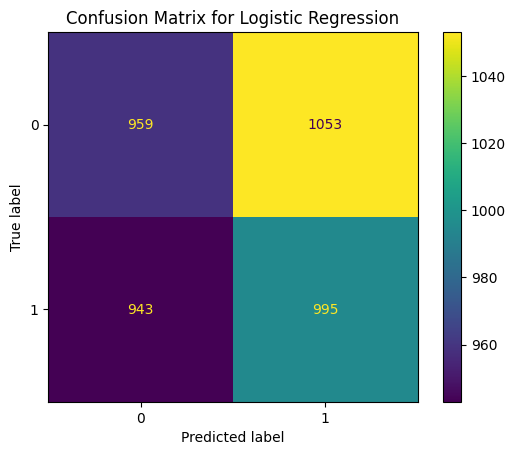

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_val, y_val)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

## Random Forest

In [22]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.49468354430379746
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      2012
           1       0.49      0.51      0.50      1938

    accuracy                           0.49      3950
   macro avg       0.50      0.50      0.49      3950
weighted avg       0.50      0.49      0.49      3950



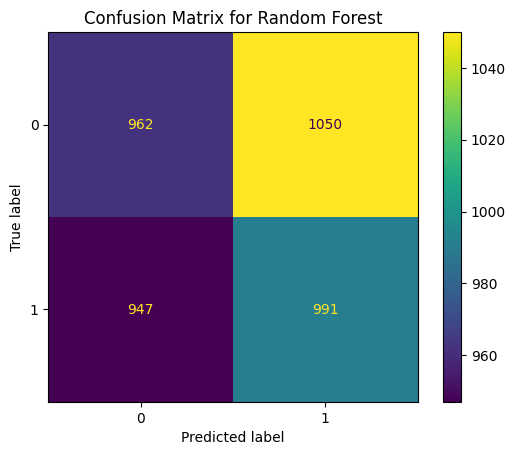

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_rf, X_val, y_val)
plt.title("Confusion Matrix for Random Forest")
plt.show()